<a href="https://colab.research.google.com/github/nkljukin/Python-train/blob/main/cats_dogs_test_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
style = "<style>svg{width:70% !important;heigth:70% !important;}<style>"
HTML(style)

In [23]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv")

In [24]:
rs = np.random.seed(0)

In [ ]:
data.isnull().sum() # пропущенные значения


Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [25]:
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [6]:
data = pd.get_dummies(data) # знаковые переменные в числовые

In [26]:
X = data[['Длина',	'Высота',	'Шерстист',	'Гавкает', 'Лазает по деревьям']]
y = data[['Вид']]

In [27]:
y.describe()

,Вид
count,1000
unique,2
top,собачка
freq,500


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [29]:
cross_val_score(clf, X_train, y_train, cv=5)

array([1., 1., 1., 1., 1.])

In [30]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [31]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'mean_cross_val': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [32]:
scores_data.head()

,max_depth,train_score,test_score,mean_cross_val
0,1,1.0,1.0,1.0
0,2,1.0,1.0,1.0
0,3,1.0,1.0,1.0
0,4,1.0,1.0,1.0
0,5,1.0,1.0,1.0


In [33]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], 
                             value_vars = ['train_score',	'test_score', 'mean_cross_val'],
                             var_name = 'set_type', value_name = 'score')

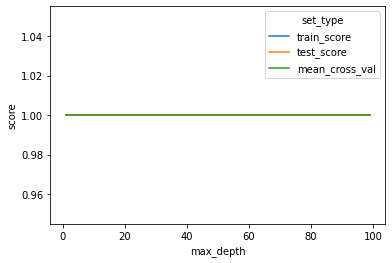

In [34]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [36]:
data_test = pd.read_json(r'/content/dataset_209691_15.txt')

In [37]:
data_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,21,25.2,1,1,0
1,15,18.0,1,1,0
2,24,28.8,1,1,0
3,26,31.2,1,1,0
4,22,26.4,1,1,0


In [38]:
data_X_test = data_test

In [39]:
result = clf.predict(data_X_test)

In [40]:
pd.Series(result)[result == 'собачка'].count()

54